<a href="https://colab.research.google.com/github/vitoranfrizio/momentum-based-strategy/blob/main/Estrat%C3%A9gia_baseada_em_momentum_(Momentum_Based_Strategy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estratégia baseada em momentum (Momentum-Based Strategy)

Uma das estratégias baseadas em momentum, usando séries temporais, é a de comprar um ativo se o último retorno foi positivo e, se foi negativo, vendê-lo. À primeira vista, a estratégia tem uma performance pobre, se comparada com a performance do ativo. Vejamos:

---

*One of the simplest momentum-based strategies using time series is to buy an asset if the last return was positive and, if it was negative, we sell it. At first glance, the strategy performs poorly compared to the asset's performance. Let's take a look:*

In [1]:
import pandas as pd
import numpy as np
from pylab import mpl, plt

rawdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sma_dataset.csv',
index_col=0, parse_dates=True).dropna()
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [2]:
datagold= pd.DataFrame(rawdata['XAU='])
datagold.rename(columns={'XAU=': 'price'}, inplace=True)
datagold['returns'] = np.log(datagold['price'] / datagold['price'].shift(1))

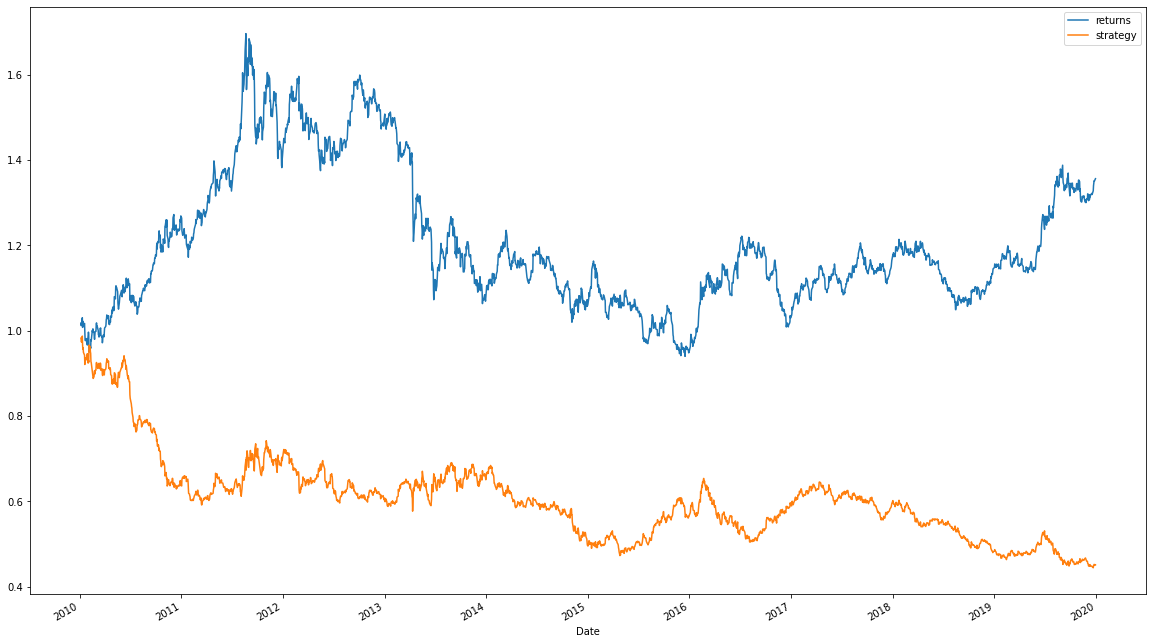

In [3]:
datagold['position'] = np.sign(datagold['returns'])
datagold['strategy'] = datagold['position'].shift(1) * datagold['returns']
datagold[['returns', 'strategy']].dropna().cumsum(
).apply(np.exp).plot(figsize=(20, 12));

O gráfico acima confirma o que esperávamos: uma péssima performance da estratégia, em comparação à performance do ativo. No entanto, podemos otimizar a performance da estratégia usando, por exemplo, a média dos n últimos retornos para gerar o sinal de compra e/ou venda. Nos próximos passos, faremos um teste com a média dos últimos 2, 3, 4, 5 e 6 retornos.

---

*The chart above confirms what we expected: a poor performance of the strategy, compared to the performance of the asset. However, we can optimize the strategy's performance by using, for example, the average of the last n returns to generate the buy and/or sell signal. In the next steps, we will test the average of the last 2, 3, 4, 5 and 6 returns.*

In [8]:
to_plot = ['returns']

for m in [2, 3, 4, 5, 6]:
  datagold['position_%d' % m] = np.sign(datagold['returns'].rolling(m).mean())
  datagold['average %d-periods strategy' % m] = (datagold['position_%d' % m].shift(1) *
  datagold['returns'])
  to_plot.append('average %d-periods strategy' % m)

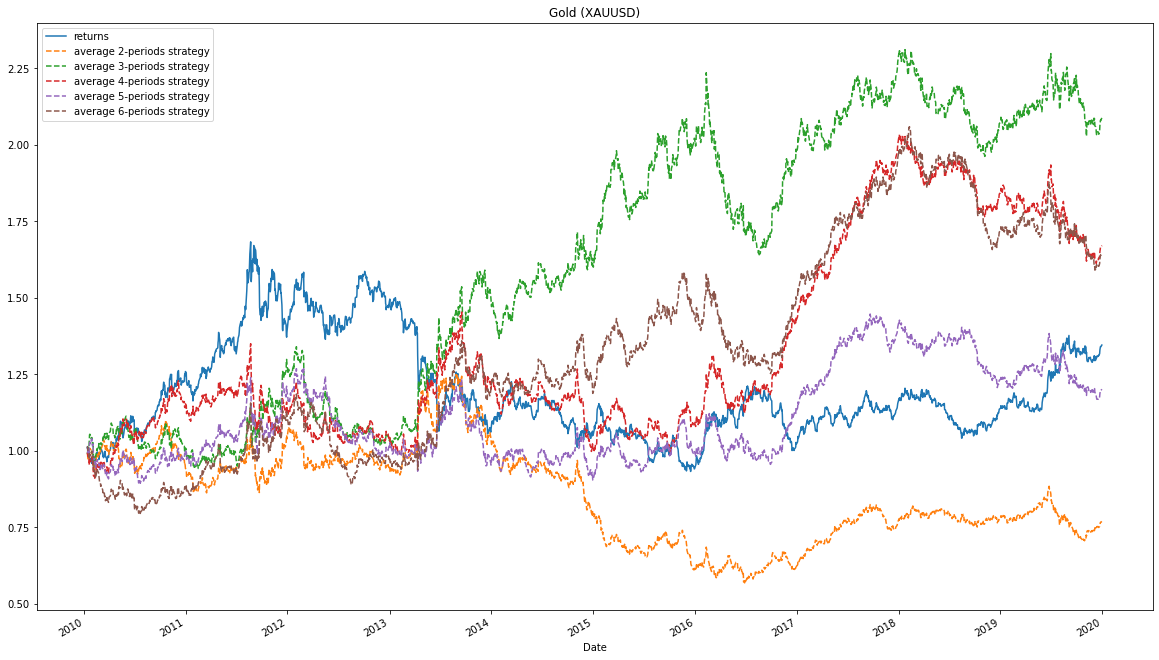

In [9]:
datagold[to_plot].dropna().cumsum().apply(np.exp).plot(
title='Gold (XAUUSD)',
figsize=(20, 12), style=['-', '--', '--', '--', '--', '--']);

## Resultado (Results)
Vimos que, na primeira estratégia (com o critério mais simples possível, diga-se de passagem), o resultado foi bem pior que a performance do próprio ativo ao longo do tempo. Com algum refino nos parâmetros (o uso dá média dos últimos n retornos do ativo), tivemos retornos substancialmente maiores que os do ativo (em 60% das estratégias testadas no exemplo), desconsiderando taxas e custos de transação.

---

*We saw that, in the first strategy (with the simplest possible criterion, so to speak), the result was much worse than the performance of the asset itself over time. With some refinement in the parameters (using the average of the last n returns of the asset), we had substantially higher returns than the asset (in 60% of the strategies tested in the example), excluding fees and other transaction costs.*